In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('train.csv')
data.head(1)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height(cm)'}>,
        <Axes: title={'center': 'weight(kg)'}>,
        <Axes: title={'center': 'waist(cm)'}>],
       [<Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'eyesight(right)'}>,
        <Axes: title={'center': 'hearing(left)'}>,
        <Axes: title={'center': 'hearing(right)'}>,
        <Axes: title={'center': 'systolic'}>],
       [<Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'fasting blood sugar'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'triglyceride'}>,
        <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'Urine protein'}>,
        <Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'AST'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes

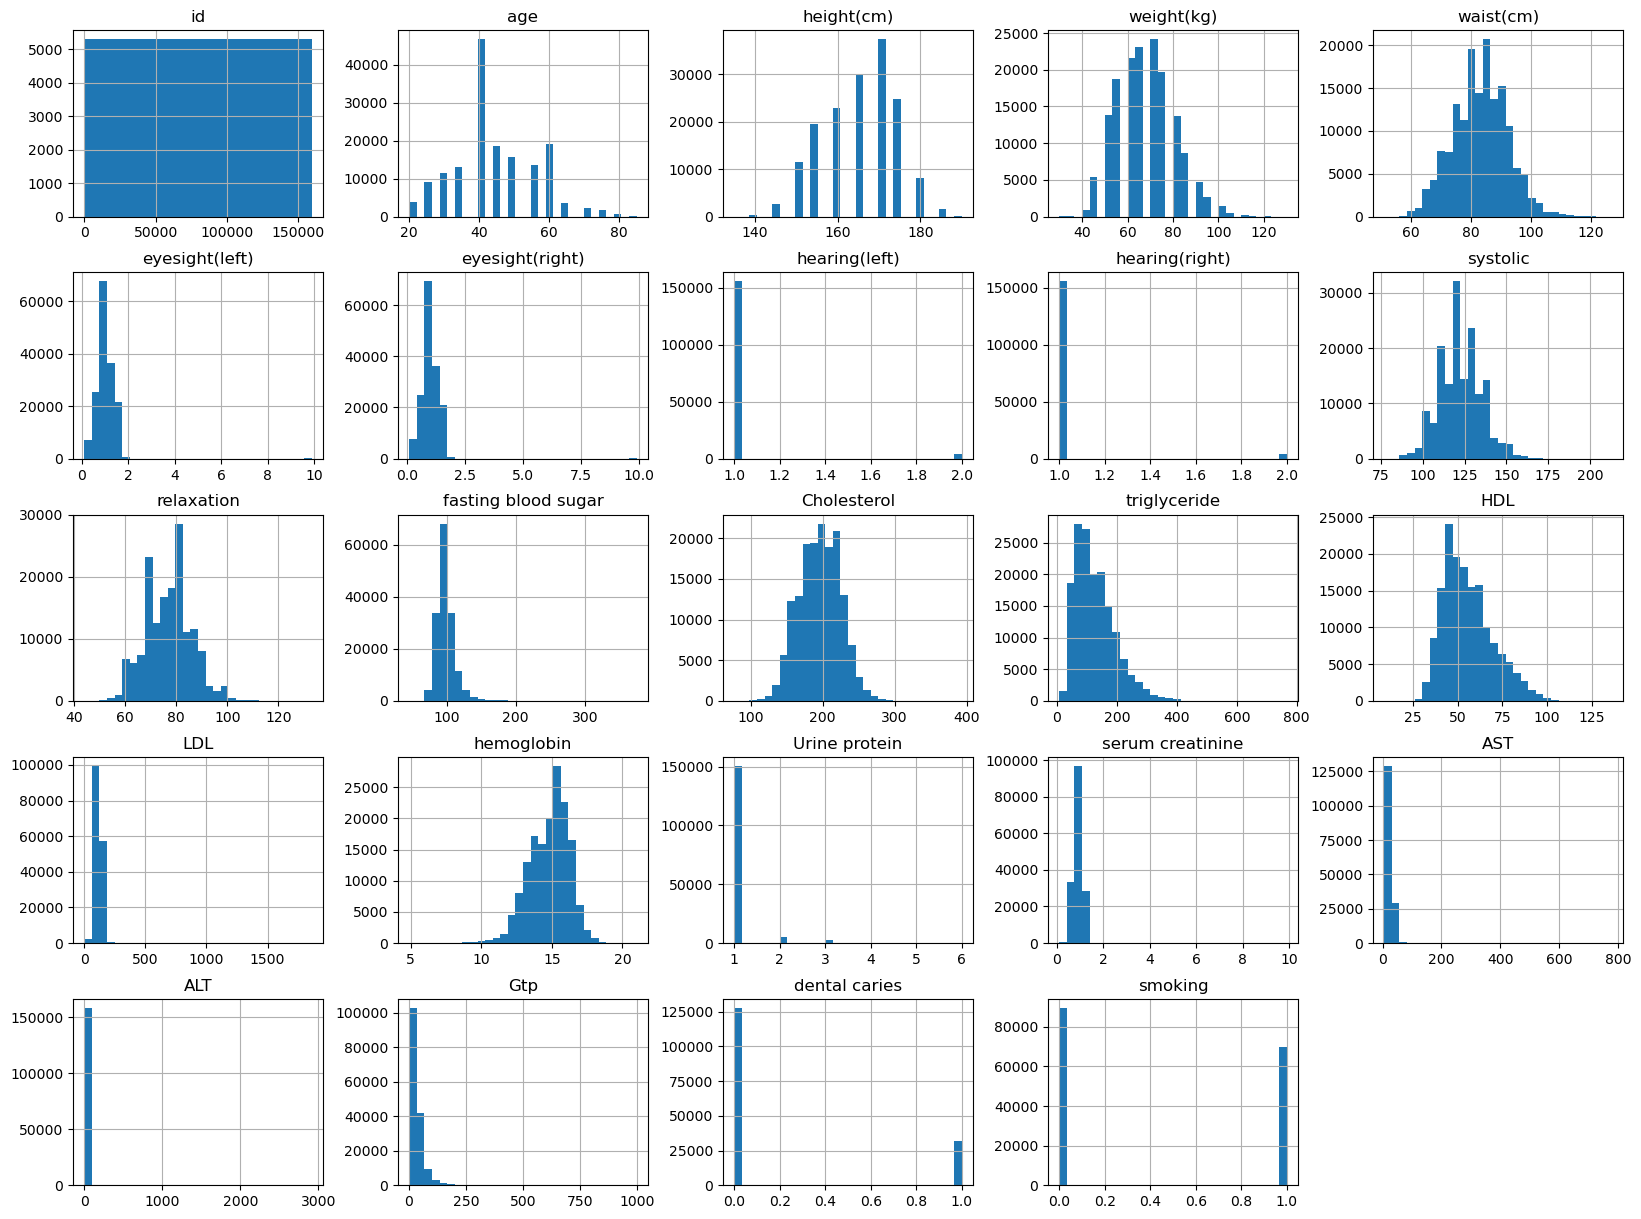

In [51]:
# Data exploration
data.hist(bins=30, figsize=(20,15))

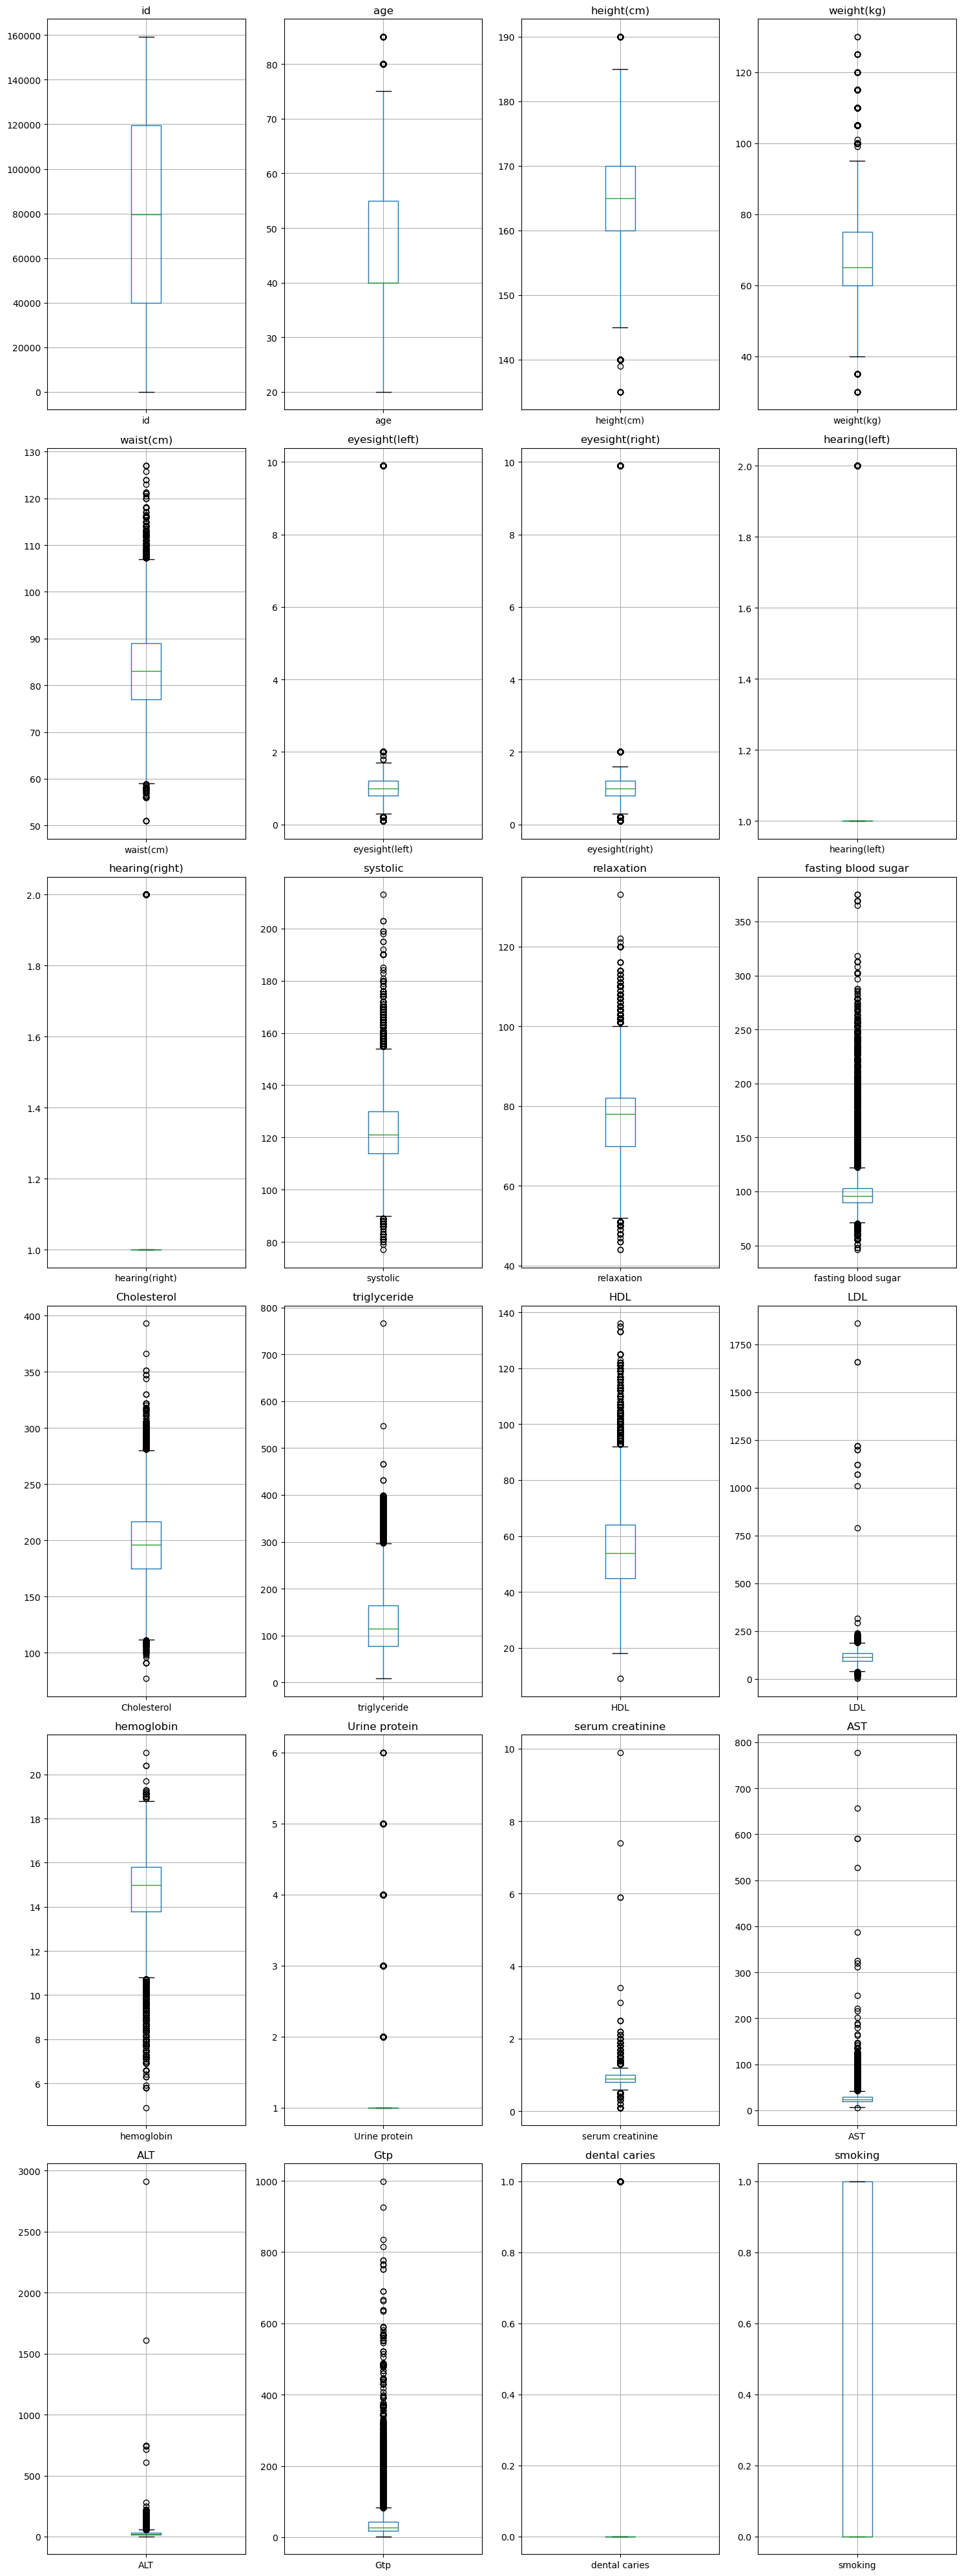

In [52]:
num_columns = len(data.columns)
num_rows = 6 
num_cols = num_columns // num_rows + (num_columns % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))

for i, column in enumerate(data.columns):
    ax = axes[i // num_cols, i % num_cols]
    data[[column]].boxplot(ax=ax)
    ax.set_title(column)

plt.tight_layout() # To avoid overlapping
plt.show()

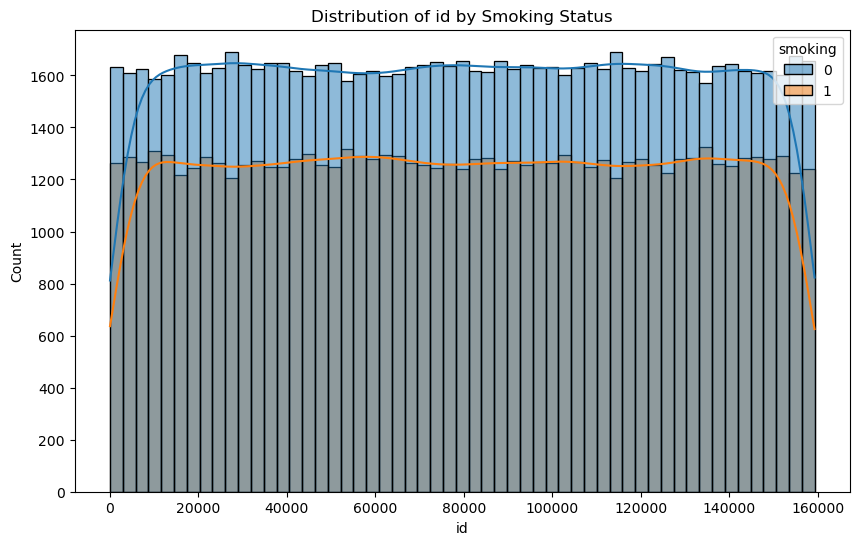

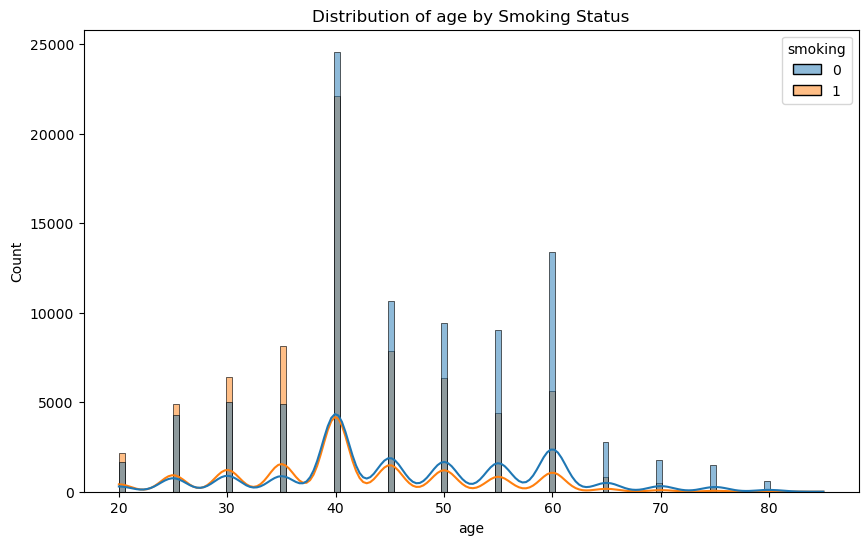

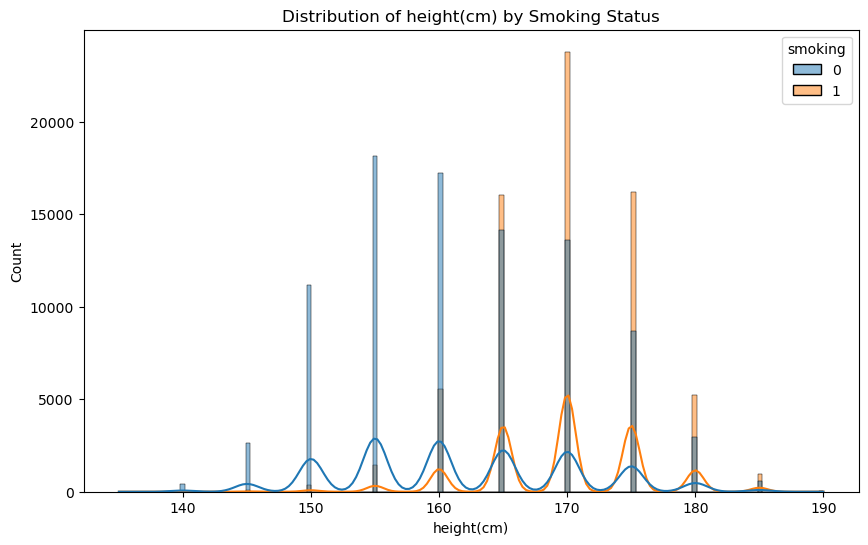

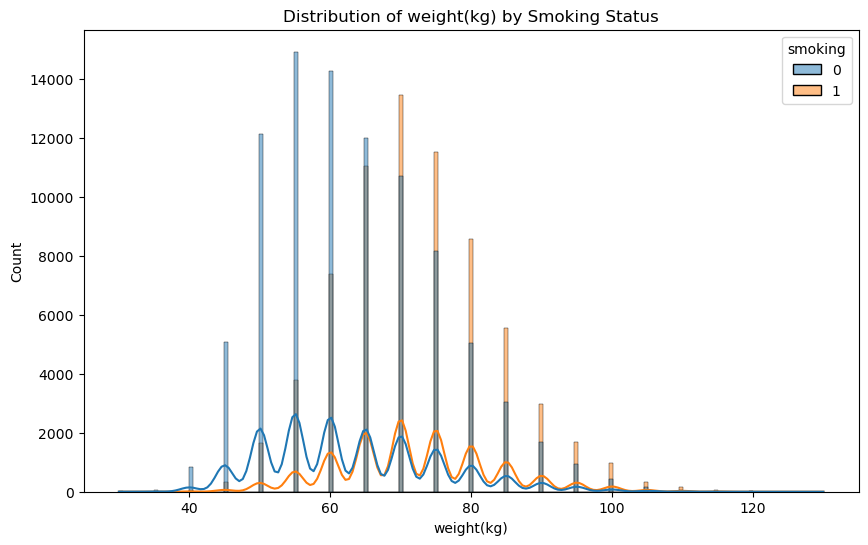

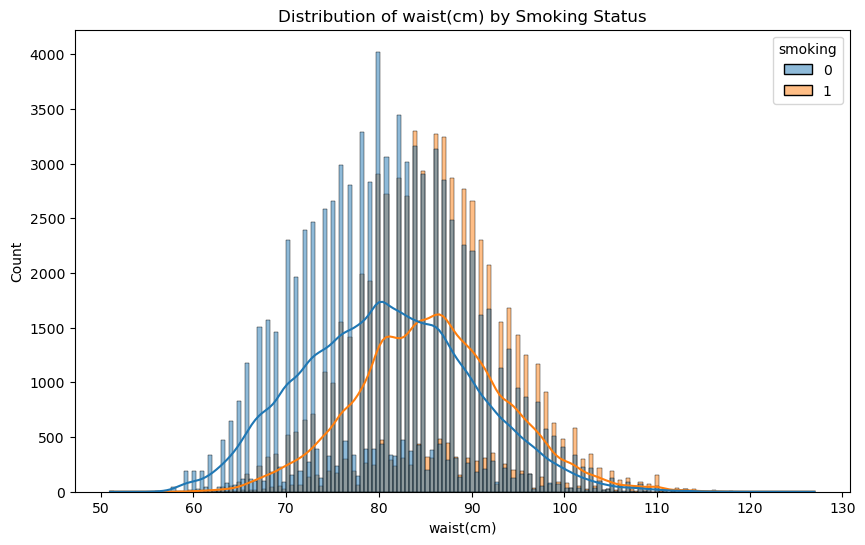

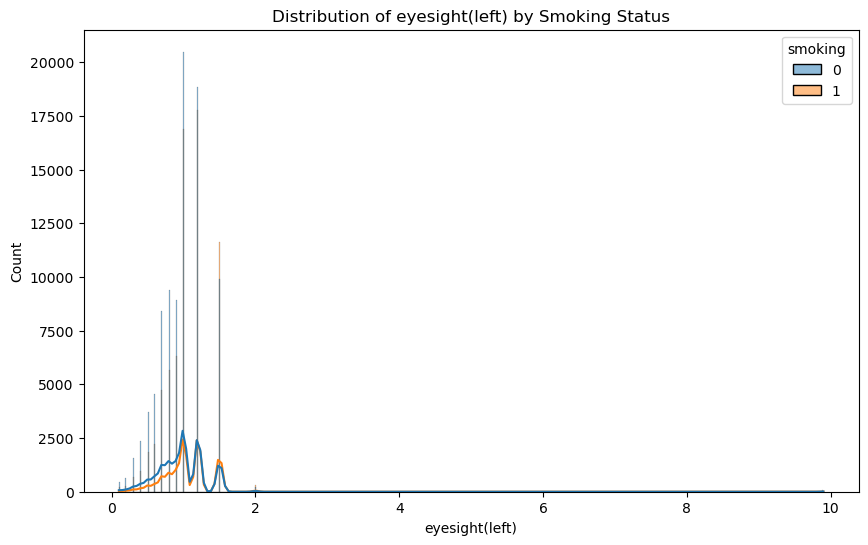

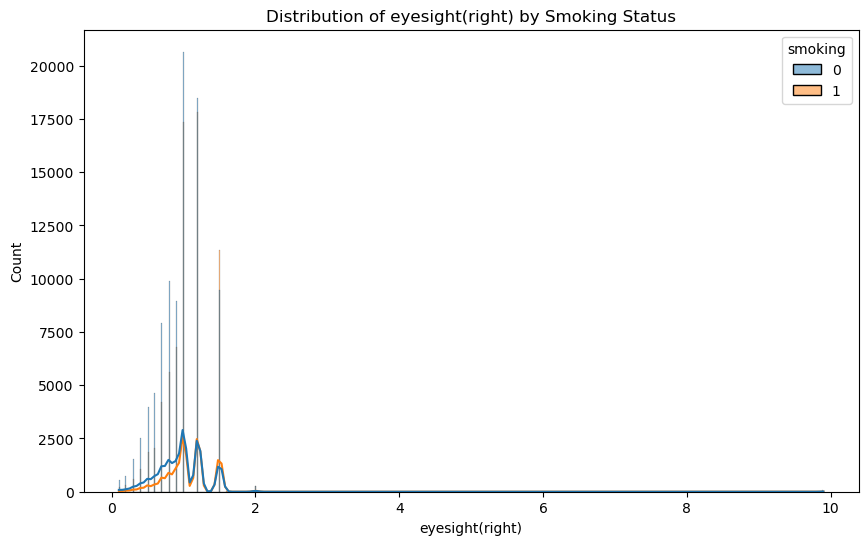

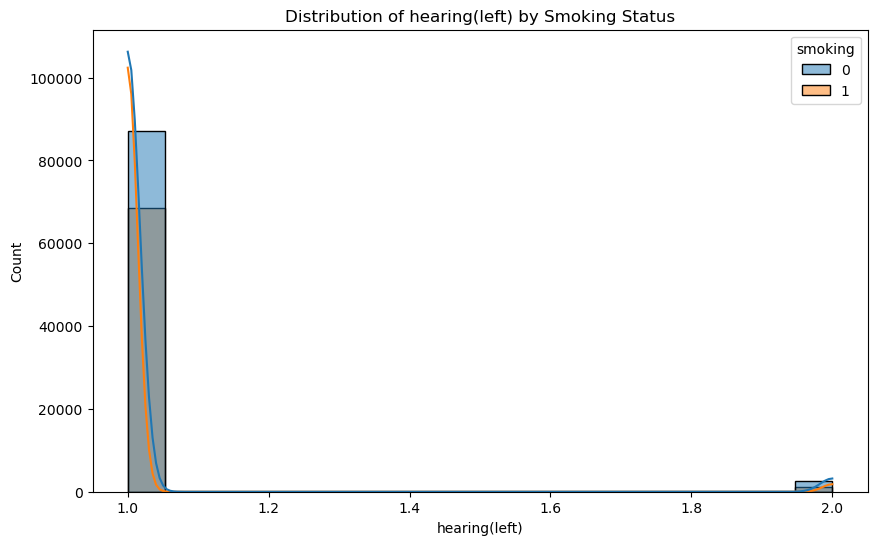

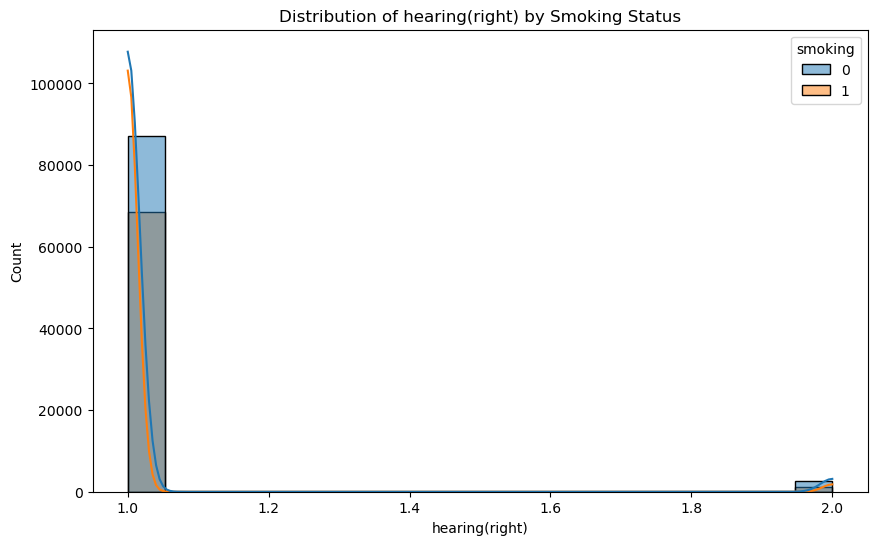

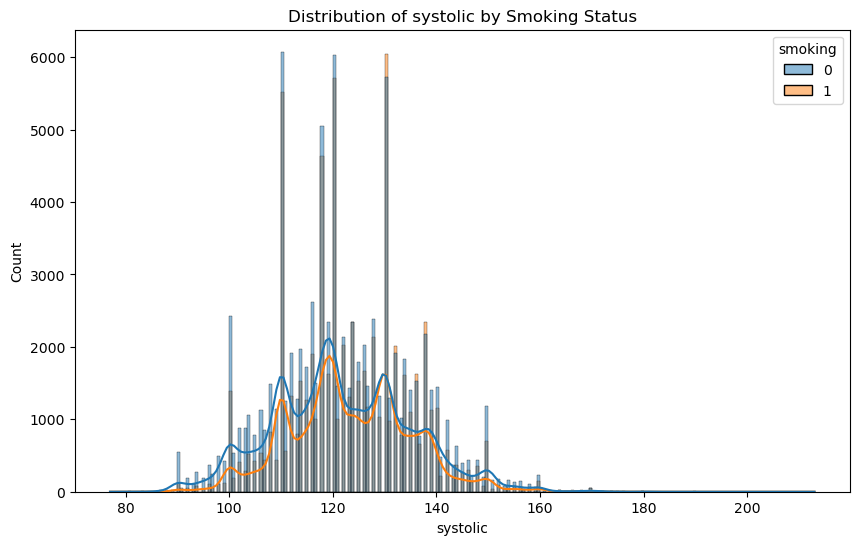

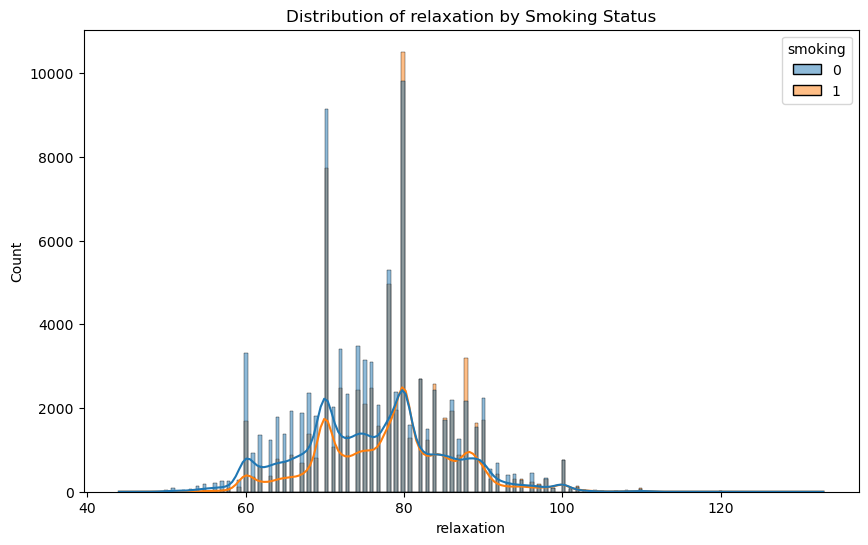

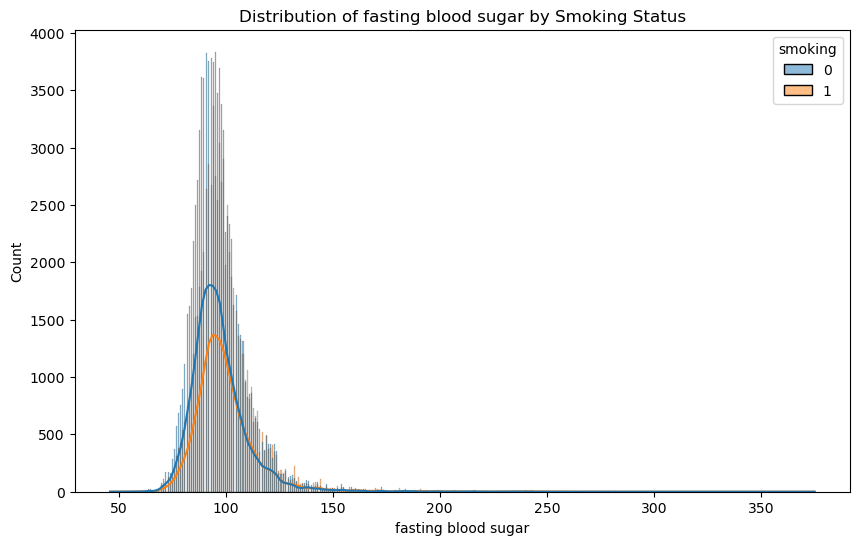

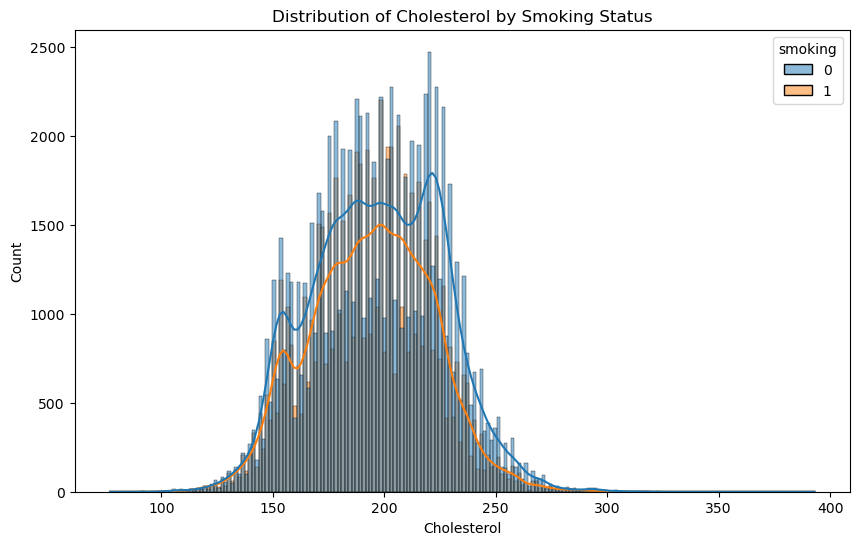

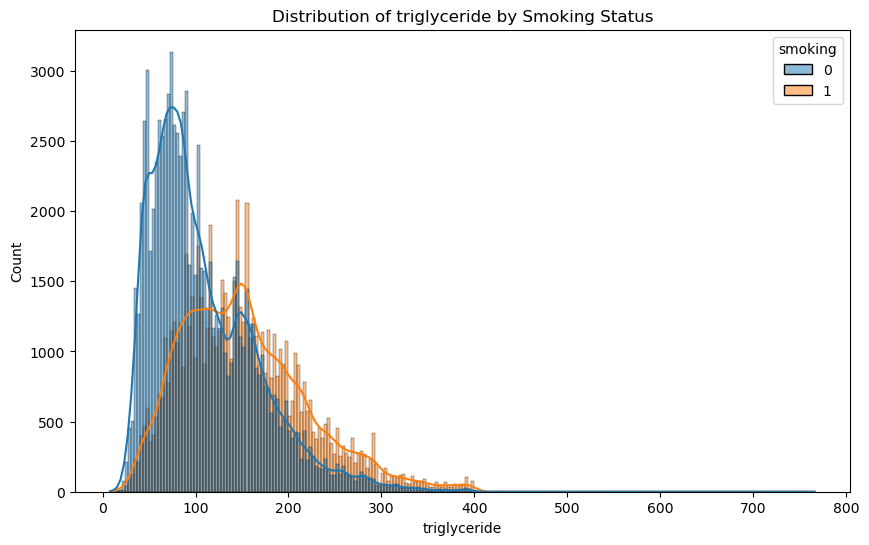

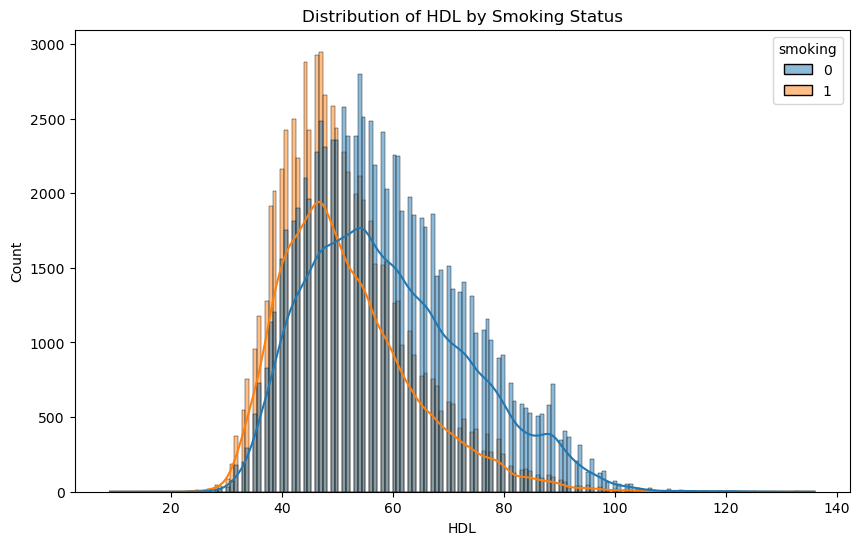

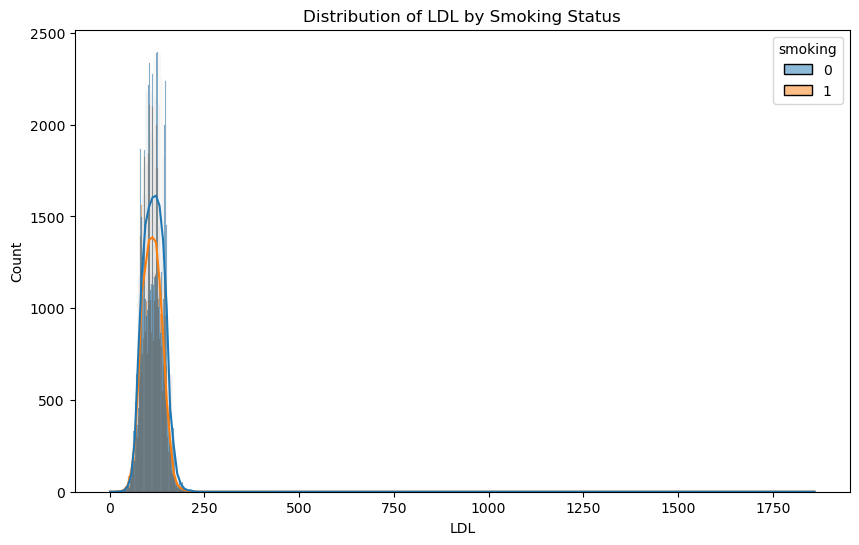

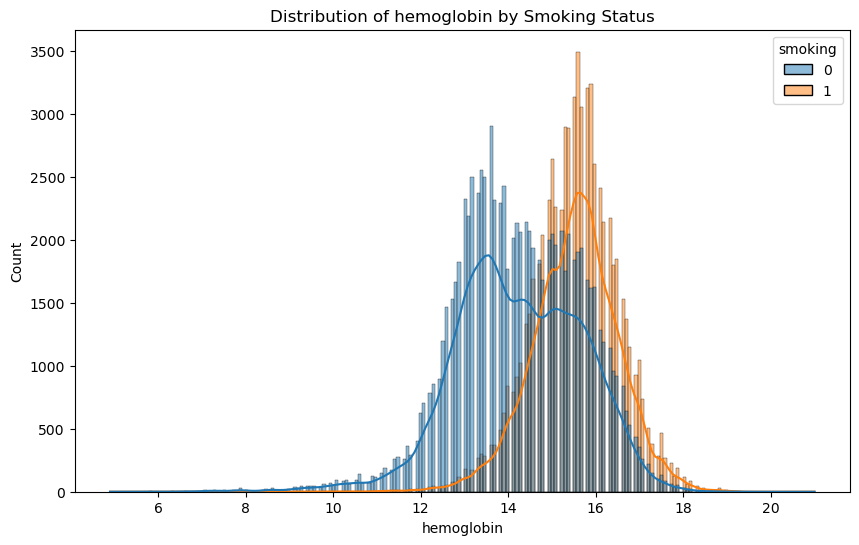

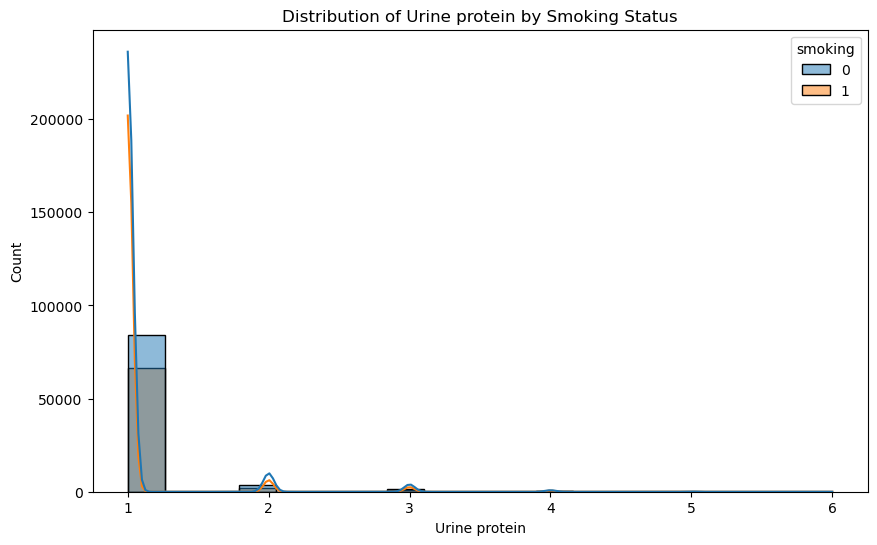

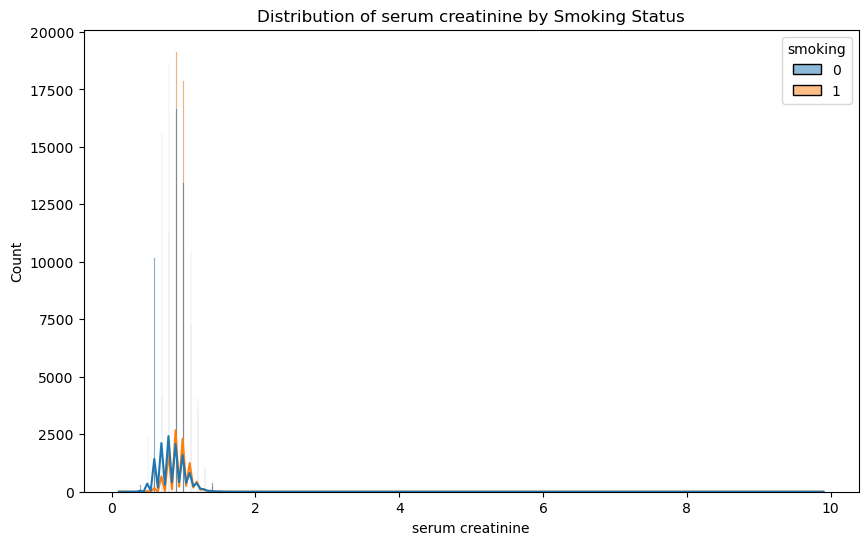

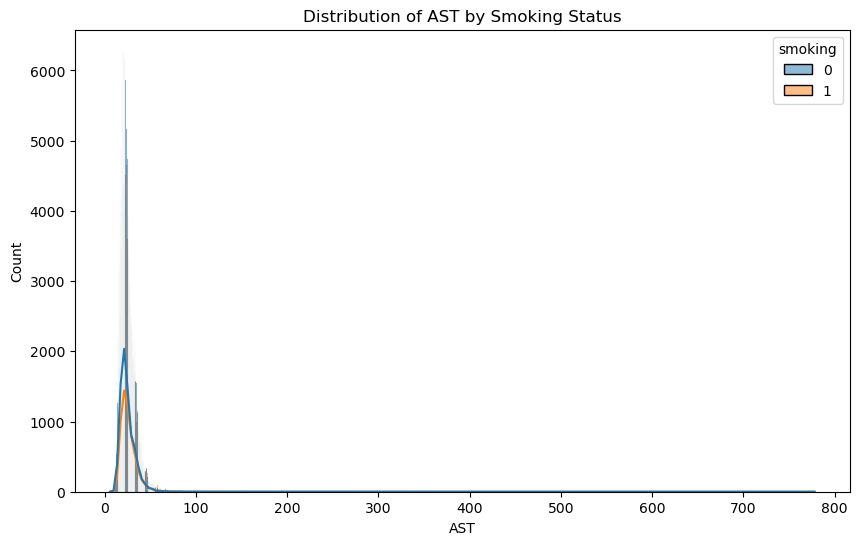

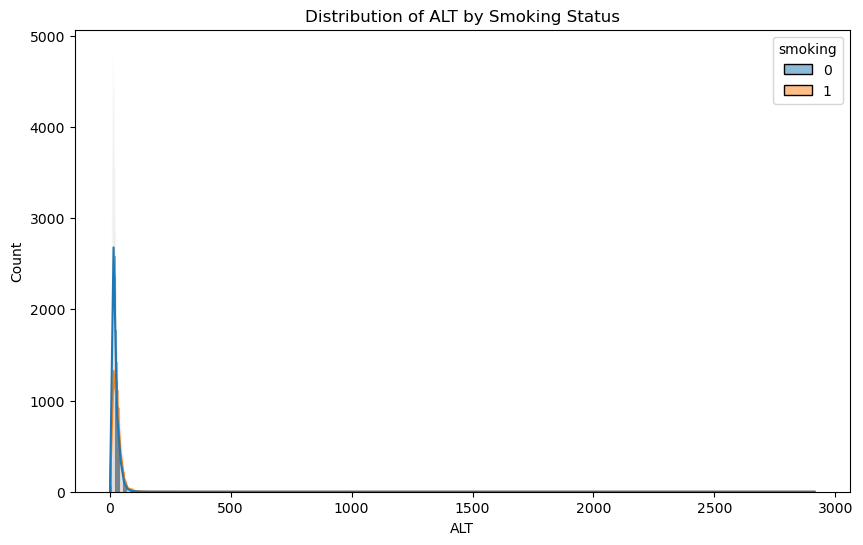

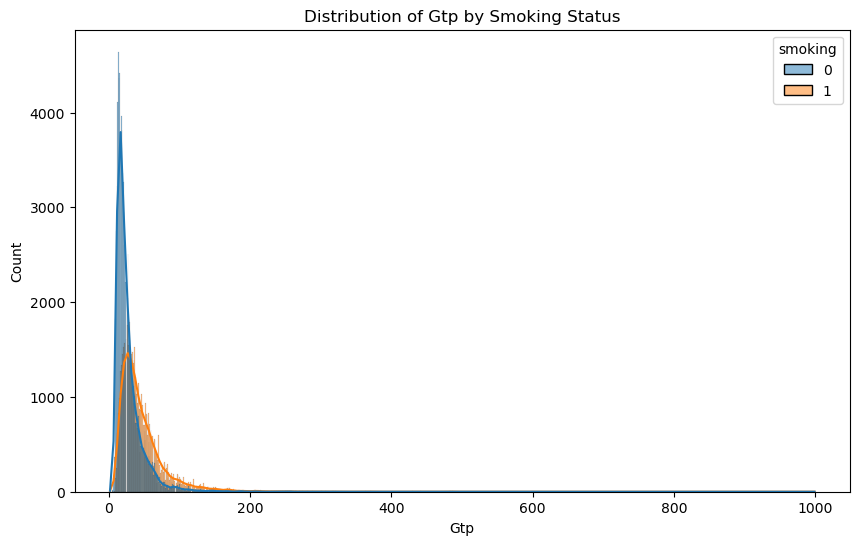

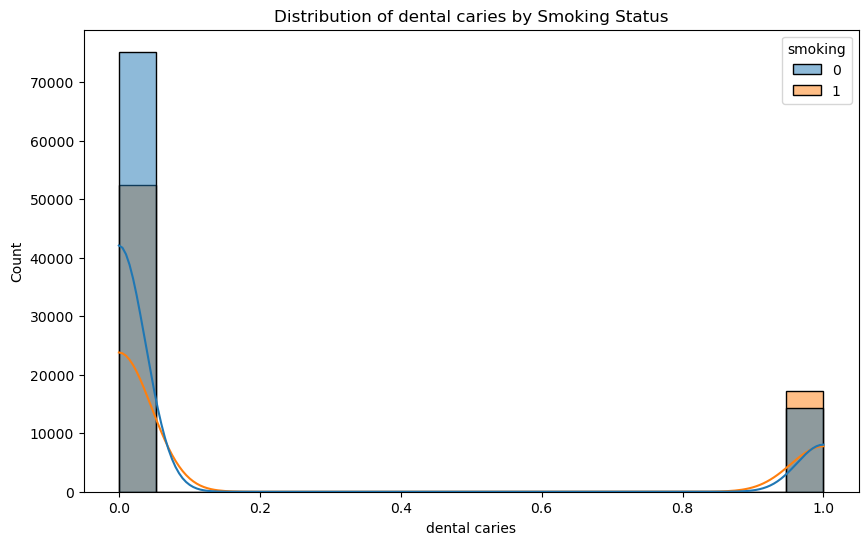

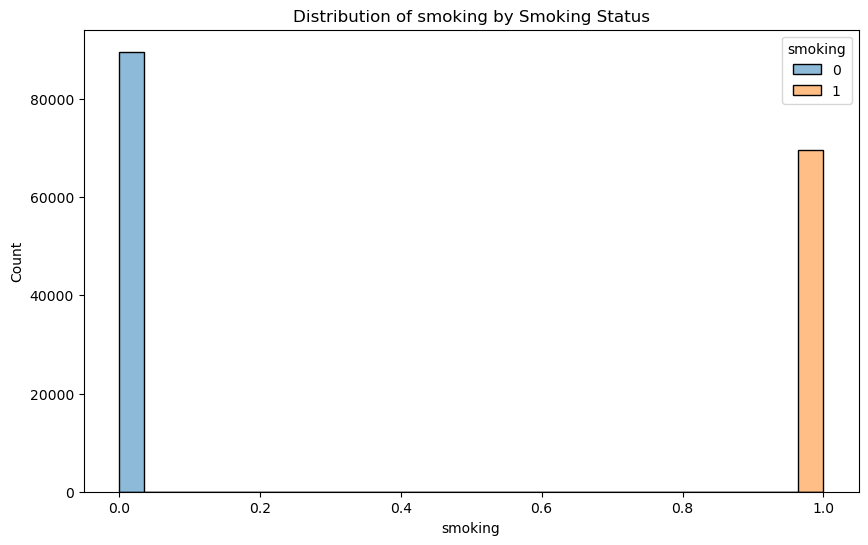

In [54]:
for column in data.columns:
    plt.figure(figsize=(10, 6))  # Задайте размер графика
    sns.histplot(data=data, x=column, hue='smoking', kde=True)
    plt.title(f'Distribution of {column} by Smoking Status')
    plt.show()

In [55]:

# as we can see, the data is not normally distributed, so we need to do some transformation
# Data Preprocessing

In [56]:
# Data Splitting